# Zalando Dataset Classification

### In this lesson, we will train 60,000 images in Zalando data, the images are grouped under 10 classes. 
### These :
### 0 T-shirt/top
### 1 Trouser
### 2 Pullover
### 3 Dresses
### 4 Coat
### 5 Sandals
### 6 Shirts
### 7 Sneakers
### 8 Bags
### 9 Ankle boot

<a href='https://www.kaggle.com/datasets/zalando-research/fashionmnist/data' target=_blank>You can find the data file here</a>

<img src=https://www.christianhaller.me/assets/img/research/FashionMNIST/fashion10x10row.jpg width='400'>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

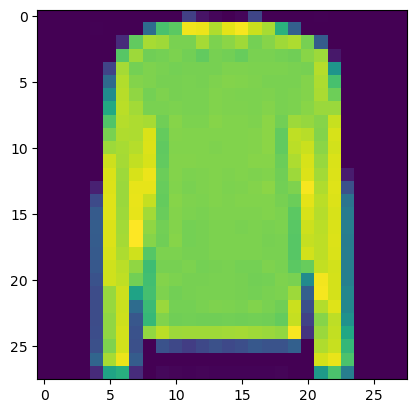

In [5]:
plt.imshow(x_train[159])

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

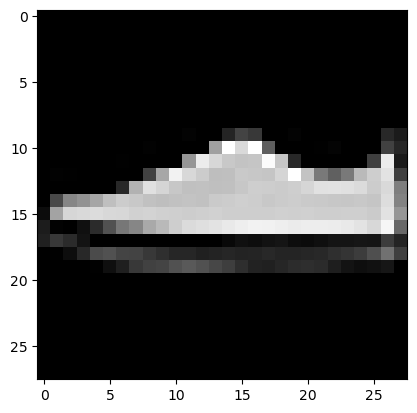

In [7]:
plt.imshow(x_train[20000],cmap='gray')

### we normalize the images

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

### Convolutional Neural Networks - CNNs - Image Classification 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
history=model.fit(x_train,y_train, validation_split=.10, epochs=15)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7462 - loss: 0.6978 - val_accuracy: 0.8748 - val_loss: 0.3516
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8725 - loss: 0.3521 - val_accuracy: 0.8917 - val_loss: 0.2919
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8891 - loss: 0.2966 - val_accuracy: 0.8993 - val_loss: 0.2707
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9015 - loss: 0.2659 - val_accuracy: 0.9035 - val_loss: 0.2578
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9102 - loss: 0.2407 - val_accuracy: 0.9047 - val_loss: 0.2625
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9180 - loss: 0.2230 - val_accuracy: 0.9065 - val_loss: 0.2536
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9258 - loss: 0.2027 - val_accuracy: 0.9143 - val_loss: 0.2395
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9318 - loss: 0

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.2982


In [15]:
accuracy

0.916100025177002

In [16]:
tahmin=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
model.save('zalando.h5')

In [18]:
import matplotlib.pyplot as plt

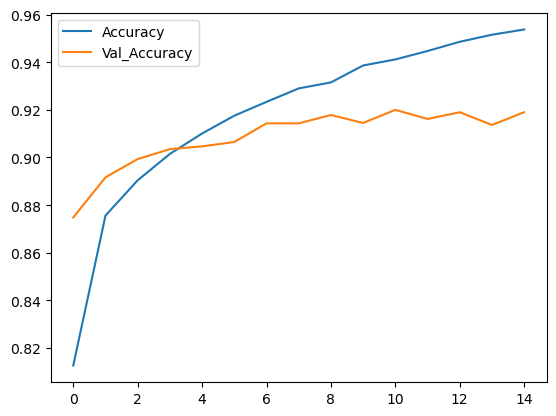

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[877,   1,  21,  13,   0,   3,  79,   0,   6,   0],
       [  3, 983,   0,  12,   1,   0,   0,   0,   1,   0],
       [ 16,   0, 871,   8,  45,   0,  59,   0,   1,   0],
       [ 12,   4,  10, 937,  16,   0,  19,   0,   1,   1],
       [  1,   0,  36,  30, 863,   0,  67,   0,   3,   0],
       [  0,   0,   0,   0,   0, 985,   0,  13,   0,   2],
       [114,   1,  67,  25,  54,   0, 732,   0,   7,   0],
       [  0,   0,   0,   0,   0,  14,   0, 962,   0,  24],
       [  3,   0,   2,   5,   2,   2,   3,   2, 980,   1],
       [  1,   0,   0,   0,   0,   5,   0,  23,   0, 971]])

In [28]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

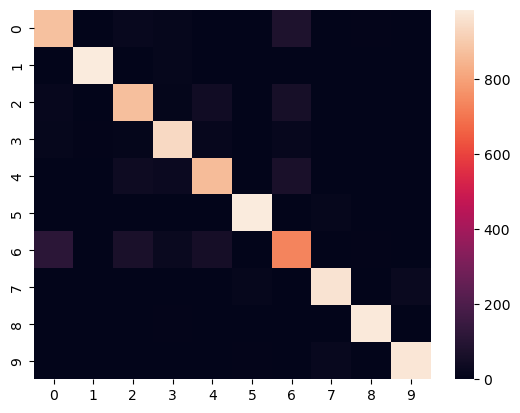

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [31]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.87      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.88      0.86      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.73      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### In this lesson, accuracy: 0.92 - loss: 0.30
### [Click for the link of the Page I Created on huggingface](https://huggingface.co/spaces/SalihB/Kiyafet_resim)